In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
delivery = pd.read_csv('C:/Users/vedant/OneDrive/Desktop/ML-Project/Datasets/deliveries.csv')
match = pd.read_csv('C:/Users/vedant/OneDrive/Desktop/ML-Project/Datasets/matches.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
total_score_df =delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [8]:
match_df =match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [9]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
teams =[
    'Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Punjab Kings',
    'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals'
]
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

# change Kings XI Punjab to Punjab Kings
match_df['team1']=match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2']=match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

# change Royal Challengers Bangalore to Royal Challengers Bengaluru
match_df['team1']=match_df['team1'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
match_df['team2']=match_df['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

# Collab file changes 

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [11]:
match_df['team1'].unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Punjab Kings',
       'Delhi Capitals', 'Mumbai Indians', 'Chennai Super Kings',
       'Rajasthan Royals'], dtype=object)

In [12]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
10,11,IPL-2017,Kolkata,13-04-2017,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN,11,170
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN,14,172
14,15,IPL-2017,Delhi,15-04-2017,Delhi Capitals,Punjab Kings,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN,15,188


In [13]:
match_df = match_df[match_df['dl_applied']==0]

In [14]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [15]:
delivery_df =match_df.merge(delivery,on='match_id')

In [16]:
delivery_df =delivery_df[delivery_df['inning']==2]

In [17]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
128,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,1,PA Patel,...,0,0,0,0,0,0,0,NaN,NaN,NaN
129,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,2,PA Patel,...,0,0,0,0,0,0,0,NaN,NaN,NaN
130,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,3,PA Patel,...,0,0,0,0,4,0,4,NaN,NaN,NaN
131,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,4,PA Patel,...,0,0,0,0,0,0,0,NaN,NaN,NaN
132,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,5,PA Patel,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [18]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [19]:
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']+1

In [20]:
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

In [21]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
128,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,1,PA Patel,...,0,0,0,0,NaN,NaN,NaN,0,179,119
129,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,2,PA Patel,...,0,0,0,0,NaN,NaN,NaN,0,179,118
130,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,3,PA Patel,...,0,4,0,4,NaN,NaN,NaN,4,175,117
131,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,4,PA Patel,...,0,0,0,0,NaN,NaN,NaN,4,175,116
132,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,5,PA Patel,...,0,1,0,1,NaN,NaN,NaN,5,174,115


In [22]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x : x if x ==0  else 1)


In [23]:
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

In [24]:
delivery_df['wickets']=10- wickets

In [25]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
128,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,1,PA Patel,...,0,0,0,0,NaN,NaN,0,179,119,10
129,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,2,PA Patel,...,0,0,0,0,NaN,NaN,0,179,118,10
130,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,3,PA Patel,...,4,0,4,0,NaN,NaN,4,175,117,10
131,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,4,PA Patel,...,0,0,0,0,NaN,NaN,4,175,116,10
132,7,Mumbai,Mumbai Indians,178,2,Mumbai Indians,Kolkata Knight Riders,1,5,PA Patel,...,1,0,1,0,NaN,NaN,5,174,115,10


In [26]:
delivery_df['crr']=delivery_df.current_score*6/(120-delivery_df.balls_left)

In [27]:
delivery_df['rrr']=delivery_df.runs_left*6/delivery_df.balls_left

In [28]:
delivery_df = delivery_df.reset_index()


In [29]:
delivery_df.drop(columns='index',inplace=True)

In [30]:
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner



In [31]:
delivery_df['winner']=is_win(delivery_df)

In [32]:
final_df =delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]


In [33]:

final_df =final_df.sample(final_df.shape[0])


In [34]:
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [35]:
print(final_df.city.unique())
print(final_df.batting_team.unique())


['Jaipur' 'Chandigarh' 'Cuttack' 'Centurion' 'Delhi' 'Abu Dhabi' 'Kolkata'
 'Dharamsala' 'Mumbai' 'Ahmedabad' 'Chennai' 'Durban' 'East London'
 'Hyderabad' 'Pune' nan 'Visakhapatnam' 'Cape Town' 'Nagpur' 'Raipur'
 'Johannesburg' 'Bangalore' 'Indore' 'Ranchi' 'Kimberley' 'Port Elizabeth'
 'Mohali' 'Sharjah' 'Bloemfontein']
['Delhi Capitals' 'Rajasthan Royals' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings']


In [36]:
import random
cities_dict = {
    'Royal Challengers Bangalore':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Kings XI Punjab':'Mumbai',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city


final_df['city']=final_df.apply(fill_city,axis=1)

In [37]:
final_df.dropna(inplace=True)
final_df =final_df[final_df.balls_left !=0]

In [38]:
from sklearn.model_selection import train_test_split
X = final_df.drop(columns=['winner','match_id'])
y = final_df['winner']
X_copy =final_df.drop(columns=['winner'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [40]:
ohe = OneHotEncoder()
ohe.fit_transform(X.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [41]:
pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
#     ('step2',RandomForestClassifier(n_jobs=-1))
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Sunrisers Hyderabad'], dtype=object),
                                                                            array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mum...
       'Centurion', 'Chandigarh', 'Chennai', 'Cuttack', 'Delhi',
       'Dharamsala', 'Durban', 'East London', 'Hyderabad', 'Indore',
       'Jaipur', 'Johannesburg', 'Kimberley', 'Kolkata', 'Mohali',
       'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur', 'Ranchi',
       'Sharjah', 'Visakhapatnam'], dtype=object)],
                                                                drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [42]:
y_pred = pipe.predict_proba(X_test)
# accuracy_score(y_test,y_pred)
y_pred

array([[0.75060572, 0.24939428],
       [0.15940995, 0.84059005],
       [0.11548595, 0.88451405],
       ...,
       [0.96805416, 0.03194584],
       [0.02603739, 0.97396261],
       [0.76543151, 0.23456849]])

In [43]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [44]:
temp_df ,target =match_progression(delivery_df,513,pipe)
temp_df

Target- 189


,end_of_over,runs_after_over,wickets_in_over,lose,win
35712,1,11,0,67.7,32.3
35718,2,7,1,79.7,20.3
35724,3,15,0,64.3,35.7
35730,4,16,0,44.0,56.0
35737,5,11,2,64.8,35.2
35743,6,10,0,57.3,42.7
35749,7,4,0,61.4,38.6
35755,8,13,0,47.3,52.7
35762,9,16,0,28.4,71.6
35768,10,12,1,31.1,68.9


Text(0.5, 1.0, 'Target-189')

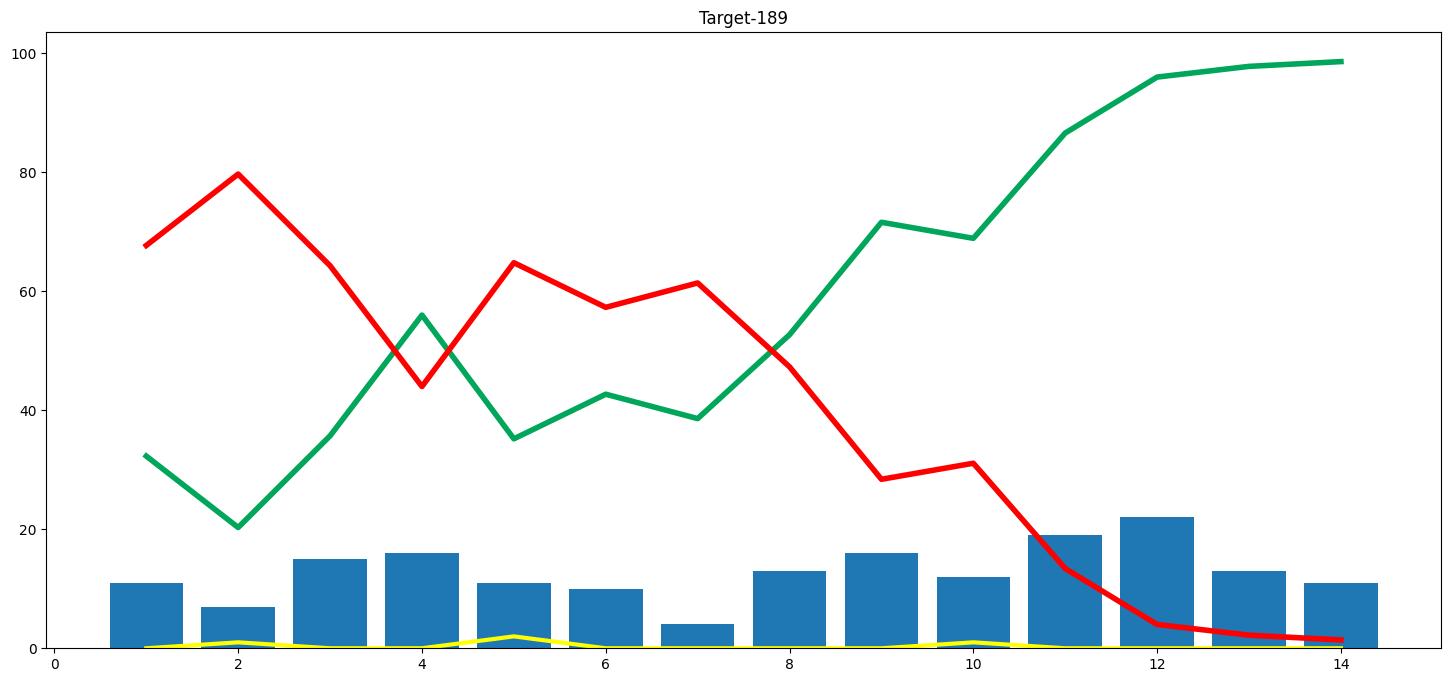

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))


In [46]:

delivery_df['city'].unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Hyderabad', 'Indore', 'Chandigarh',
       'Bangalore', 'Jaipur', 'Chennai', 'Cape Town', 'Durban',
       'Port Elizabeth', 'Centurion', 'East London', 'Johannesburg',
       'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur',
       'Dharamsala', 'Visakhapatnam', 'Pune', 'Raipur', 'Abu Dhabi', nan,
       'Sharjah', 'Ranchi', 'Mohali'], dtype=object)

In [47]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [48]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [49]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
39316,Kings XI Punjab,Mumbai Indians,Chandigarh,145,98,9,172,7.636364,8.877551
34018,Mumbai Indians,Sunrisers Hyderabad,Hyderabad,96,66,9,157,6.888889,8.727273
18494,Delhi Capitals,Kolkata Knight Riders,Delhi,66,34,5,148,5.790698,11.647059
40388,Rajasthan Royals,Chennai Super Kings,Chennai,29,9,4,157,6.972973,19.333333
25236,Delhi Capitals,Kolkata Knight Riders,Pune,111,81,8,162,8.000000,8.222222
...,...,...,...,...,...,...,...,...,...
40487,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,87,34,4,185,6.906977,15.352941
42075,Sunrisers Hyderabad,Kings XI Punjab,Hyderabad,137,112,10,143,5.250000,7.339286
356,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,163,107,10,172,4.615385,9.140187
7002,Rajasthan Royals,Chennai Super Kings,Mumbai,119,74,7,163,5.869565,9.648649
